## **Exercise ML - NOTEBOOK #2: Model Training**
Created by **Sebastian Belalcazar Mosquera**.

### **Setting Environment**

In [1]:
import os 
print(os.getcwd())

try:
    os.chdir("../../ml_exercise")

except FileNotFoundError:
    print("""
        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to workshop-003.
        """)
    
print(os.getcwd())

d:\U\FIFTH SEMESTER\ETL\exercise_ml\notebooks
d:\U\FIFTH SEMESTER\ETL\ml_exercise


### **Importing modules and libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
import joblib

### **Read Data**

In [3]:
df = pd.read_csv("data\MLA_100k_clean.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_19352\3730995976.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("data\MLA_100k_clean.csv")


,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,initial_quantity,available_quantity,local_pick_up,free_shipping,mode
0,new,bronze,80.0,buy_it_now,True,False,active,1,1,True,False,not_specified
1,used,silver,2650.0,buy_it_now,True,False,active,1,1,True,False,me2
2,used,bronze,60.0,buy_it_now,True,False,active,1,1,True,False,me2
3,new,silver,580.0,buy_it_now,True,False,active,1,1,True,False,me2
4,used,bronze,30.0,buy_it_now,True,False,active,1,1,True,False,not_specified


In [4]:
original_columns = df.columns
df.columns

Index(['condition', 'listing_type_id', 'price', 'buying_mode',
       'accepts_mercadopago', 'automatic_relist', 'status', 'initial_quantity',
       'available_quantity', 'local_pick_up', 'free_shipping', 'mode'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99372 entries, 0 to 99371
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   condition            99372 non-null  object 
 1   listing_type_id      99372 non-null  object 
 2   price                99372 non-null  float64
 3   buying_mode          99372 non-null  object 
 4   accepts_mercadopago  99372 non-null  bool   
 5   automatic_relist     99372 non-null  bool   
 6   status               99372 non-null  object 
 7   initial_quantity     99372 non-null  int64  
 8   available_quantity   99372 non-null  int64  
 9   local_pick_up        99372 non-null  bool   
 10  free_shipping        99372 non-null  bool   
 11  mode                 99372 non-null  object 
dtypes: bool(4), float64(1), int64(2), object(5)
memory usage: 6.4+ MB


### **Data Preprocessing**

##### **`condition` to numerical values**

In [6]:
le = LabelEncoder()

In [7]:
df['condition'] = le.fit_transform(df['condition'])

##### **Dummies & Split data**

In [8]:
df = pd.get_dummies(df, columns=['listing_type_id', 'buying_mode', 'status', 'mode'], drop_first=True)

In [9]:
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_cols = ['price', 'initial_quantity', 'available_quantity']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### **Models Training and Performance**

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [11]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }
    
df_results = pd.DataFrame(results).T

In [12]:
print("Model Performance Metrics:\n")
print(df_results)

Model Performance Metrics:

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.748981   0.884574  0.528232  0.661464  0.859171
Random Forest        0.824252   0.778080  0.869405  0.821211  0.904274
XGBoost              0.829937   0.809726  0.828330  0.818922  0.915702
Gradient Boosting    0.820377   0.803846  0.810989  0.807402  0.909765
KNN                  0.811874   0.783764  0.821394  0.802138  0.884308


- **Accuracy:** Overall correctness.

- **Precision:** Accuracy of positive predictions.

- **Recall:** Ability to find all positives.

- **F1-Score:** Balance of precision and recall.

- **ROC-AUC:** Overall ability to distinguish classes.

In [13]:
best_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

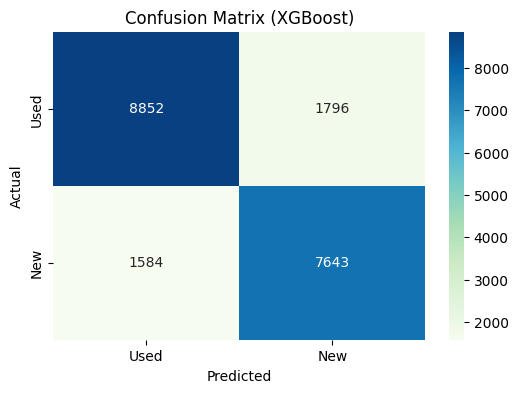

In [14]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=['Used', 'New'], yticklabels=['Used', 'New'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- **True Positives (TP) = 8852:** The model correctly predicted "Used" when the actual class was "Used".
- **False Positives (FP) = 1584:** The model incorrectly predicted "New" as "Used".
- **False Negatives (FN) = 1796:** The model incorrectly predicted "Used" as "New".
- **True Negatives (TN) = 7643:** The model correctly predicted "New" when the actual class was "New".

In [15]:
importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

C:\Users\sebas\AppData\Local\Temp\ipykernel_19352\1193611222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')


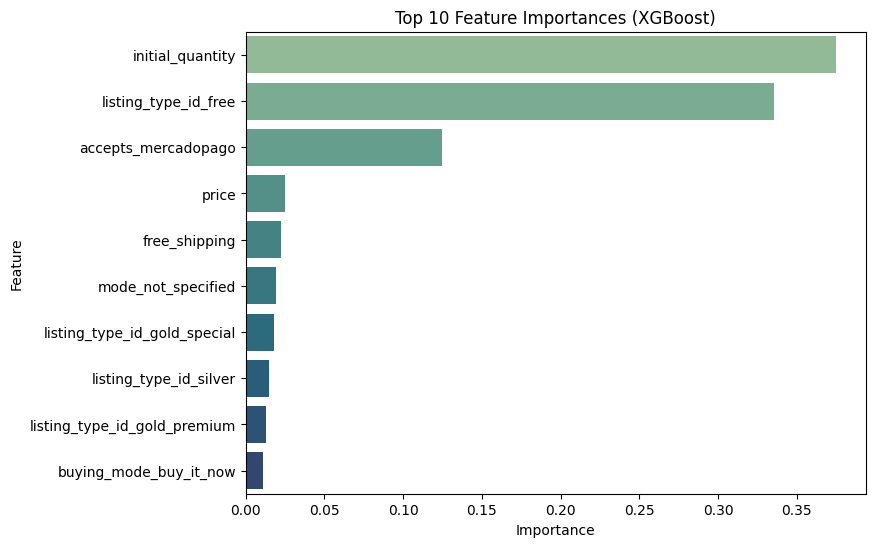

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='crest')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### **Save PKL File**

In [17]:
joblib.dump(best_model, 'model/xgboost_model.pkl')

['model/xgboost_model.pkl']